In [83]:
import sys
sys.path.append('../..')

In [84]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
from DomainPrediction.utils import helper

In [86]:
data_path = '../../../Data/al_test_experiments/Tdomain'

### Load Data for processing

In [87]:
df = pd.read_csv(os.path.join(data_path, 'Tdomainr2.csv'))

In [88]:
df.head()

,Name,Sequence,Peak Area,norm_WT
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,34184750.00,1.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,33586017.00,0.982485
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,59143934.67,0.958725
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,2499471.00,0.035325
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,15653904.33,0.457921


In [89]:
df.shape

(106, 4)

In [90]:
wt = helper.read_fasta(os.path.join(data_path, 'Tdomain_WT.fasta'), mode='str')[0]

In [91]:
len(wt)

115

In [92]:
## sanilty check sequences
check_seqs = helper.read_fasta(os.path.join(data_path, 'round_1_extraction.fasta'), mode='str')
for i, seq in enumerate(check_seqs):
    assert df['Sequence'][i] == seq

In [93]:
def hamming_distance(seq1, seq2):
    # Ensure the sequences are of the same length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length to compute Hamming distance.")
    
    # Count differences
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [94]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = df['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

In [95]:
dist_matrix[0,:]

array([ 0., 44., 45., 46., 43., 41., 54., 46., 52., 60., 59., 58., 71.,
       54., 55., 78., 74., 55., 78., 44., 55., 39., 51., 56., 37., 39.,
       50., 49., 89., 53., 58., 34., 49., 53., 59., 53., 59.,  2.,  3.,
        3.,  5.,  6.,  2.,  1.,  6.,  4.,  1.,  3.,  1.,  2.,  2.,  5.,
        5., 26., 33.,  7., 33.,  1.,  1., 45., 46., 47., 45., 46., 45.,
       47., 45., 48., 46., 46., 46., 46., 45., 47., 45., 45., 45., 44.,
       45., 45., 45., 47., 46.,  0.,  0.,  1.,  1.,  4.,  1.,  1.,  0.,
        1.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,
        0.,  4.])

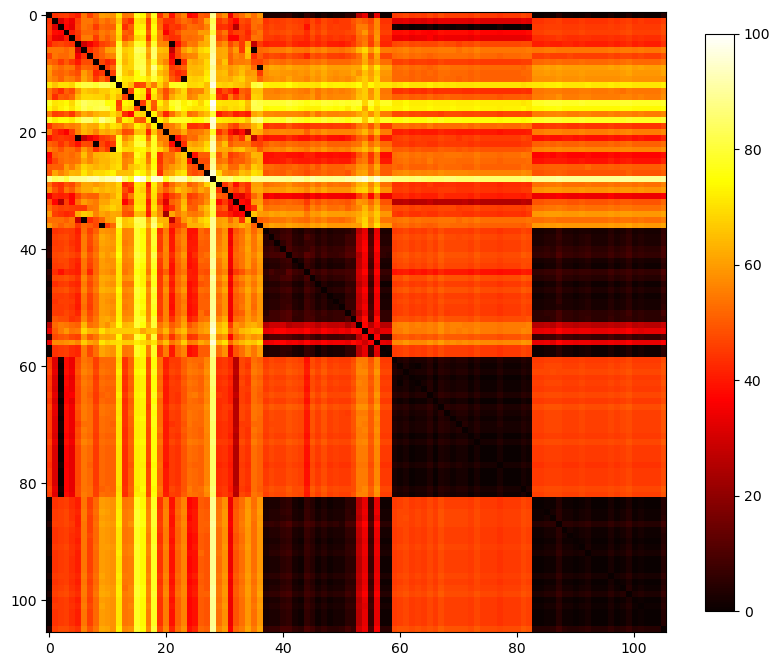

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.show()

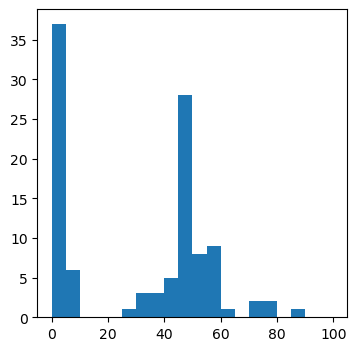

In [105]:
dist_from_wt = []
for seq in df['Sequence']:
    dist_from_wt.append(hamming_distance(wt, seq))

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.hist(dist_from_wt, bins=np.linspace(0, 100, 21))
plt.show()
# print(np.array(dist_from_wt))
# print(df['Name'].to_numpy())

#### Duplicates

In [107]:
for name in df['Name']:
    _df = df[df['Sequence'] == df.loc[df['Name'] == name, 'Sequence'].iloc[0]]
    if _df.shape[0] > 1:
        print(name)

WT
ESM2
ESM2_EP_10_1_4
ESM2_EP_10_1_6
ESM2_EP_10_1_8
ESM2_EP_10_1_11
ESM2_EP_10_1_17
ESM2_EP_10_1_19
ESM2_EP_10_1_20
ESM2_EP_10_1_21
ESM2_EP_10_1_23
ESM2_EP_10_1_24
ESM2_EP_10_1_25
WT_EP_10_1_31
WT_EP_10_1_33
WT_EP_10_1_39
WT_EP_10_1_42
WT_EP_10_1_43
WT_EP_10_1_44
WT_EP_10_1_46
WT_EP_10_1_50
WT_EP_10_1_53
WT_EP_10_1_54
WT_EP_10_1_55


In [109]:
df[df['Sequence'] == df.loc[df['Name'] == 'WT', 'Sequence'].iloc[0]]

,Name,Sequence,Peak Area,norm_WT
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,34184750.0,1.000000
83,WT_EP_10_1_31,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,5489584.0,1.110265
84,WT_EP_10_1_33,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,8926807.0,1.805441
90,WT_EP_10_1_39,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,4155013.0,0.840349
93,WT_EP_10_1_42,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,4398260.0,0.889545
94,WT_EP_10_1_43,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,3134582.0,0.633967
95,WT_EP_10_1_44,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,3507548.0,0.709399
97,WT_EP_10_1_46,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,2727505.0,0.551636
100,WT_EP_10_1_50,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,3226083.0,0.652473
102,WT_EP_10_1_53,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,3168615.0,0.640850


In [110]:
df[df['Sequence'] == df.loc[df['Name'] == 'ESM2', 'Sequence'].iloc[0]]

,Name,Sequence,Peak Area,norm_WT
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,59143934.67,0.958725
62,ESM2_EP_10_1_6,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,4263072.00,0.770793
66,ESM2_EP_10_1_11,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,4152809.00,0.750856
72,ESM2_EP_10_1_17,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,4728134.00,0.854879
74,ESM2_EP_10_1_19,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,2229884.00,0.403178
75,ESM2_EP_10_1_20,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,2307273.00,0.417171
76,ESM2_EP_10_1_21,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,3665634.00,0.662772
78,ESM2_EP_10_1_23,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1970463.00,0.356273
79,ESM2_EP_10_1_24,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,4492533.00,0.812281
80,ESM2_EP_10_1_25,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,4274864.00,0.772925


In [111]:
df[df['Sequence'] == df.loc[df['Name'] == 'ESM2_EP_10_1_4', 'Sequence'].iloc[0]]

,Name,Sequence,Peak Area,norm_WT
60,ESM2_EP_10_1_4,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,5445146.0,0.984520
63,ESM2_EP_10_1_8,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,2983411.0,0.539421


In [113]:
df = df.drop_duplicates(subset='Sequence')

In [114]:
df.shape

(85, 4)

In [115]:
for name in df['Name']:
    _df = df[df['Sequence'] == df.loc[df['Name'] == name, 'Sequence'].iloc[0]]
    if _df.shape[0] > 1:
        print(name)

#### Splitting

In [116]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = df['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

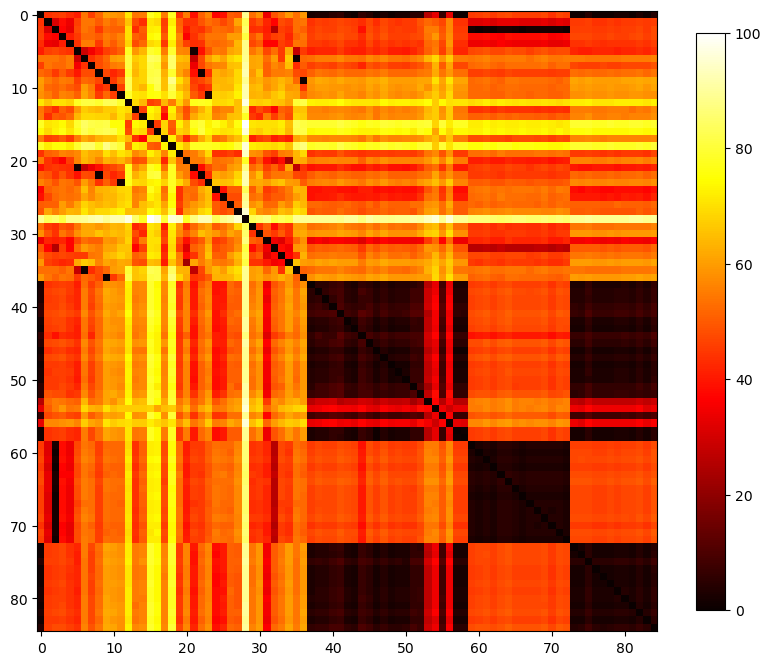

In [117]:
plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.show()

In [134]:
df.shape[0], df['Name'].str.contains("ESM2").sum(), df['Name'].str.contains("esm3").sum(), df['Name'].str.contains("evodiff").sum() #need 13 more to set up a dataset

(85, 17, 10, 5)

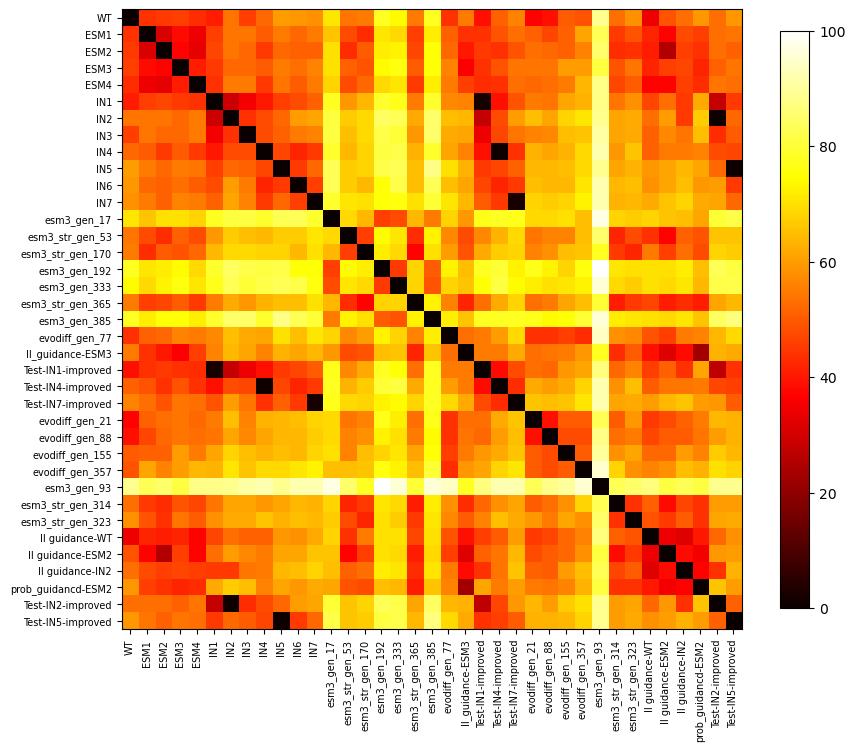

In [126]:
ai_gen = ['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4',
            'IN5', 'IN6', 'IN7', 'esm3_gen_17', 'esm3_str_gen_53',
            'esm3_str_gen_170', 'esm3_gen_192', 'esm3_gen_333',
            'esm3_str_gen_365', 'esm3_gen_385', 'evodiff_gen_77',
            'II_guidance-ESM3', 'Test-IN1-improved', 'Test-IN4-improved',
            'Test-IN7-improved', 'evodiff_gen_21', 'evodiff_gen_88',
            'evodiff_gen_155', 'evodiff_gen_357', 'esm3_gen_93',
            'esm3_str_gen_314', 'esm3_str_gen_323', 'II guidance-WT',
            'II guidance-ESM2', 'II guidance-IN2', 'prob_guidancd-ESM2',
            'Test-IN2-improved', 'Test-IN5-improved']

mask = df['Name'].isin(ai_gen)

dist_matrix = np.eye(df[mask]['Sequence'].shape[0])
sequences = df[mask]['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), ai_gen, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), ai_gen, size=7)
plt.show()

In [135]:
df.shape[0], df['Name'].str.contains("ESM2").sum(), df['Name'].str.contains("esm3").sum(), df['Name'].str.contains("evodiff").sum() #need 13 more to set up a dataset

(85, 17, 10, 5)

In [149]:
df.assign(split_id=2)
df.loc[df['Name'].str.contains("ESM2"), 'split_id'] = 0
df.loc[df['Name'].str.contains("esm3_str"), 'split_id'] = 0
df.loc[df['Name'].str.contains("evodiff"), 'split_id'] = 0
df.loc[df['Name'].str.contains("esm3_gen"), 'split_id'] = 1

train_size = df[df['split_id']==2].shape[0]
val_size = df[df['split_id']==1].shape[0]
test_size = df[df['split_id']==0].shape[0]
print(f"train: {train_size}, val: {val_size}, test: {test_size}")

train: 53, val: 5, test: 27


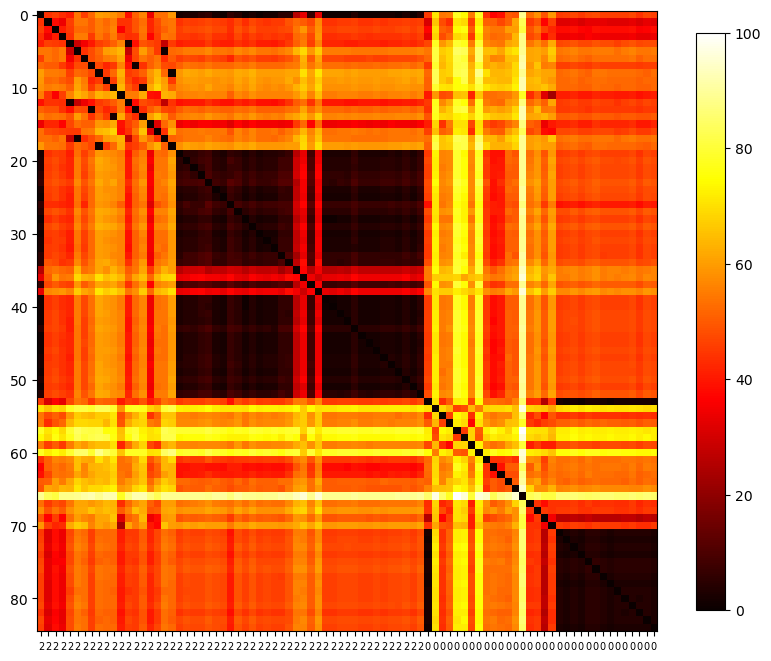

In [158]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = np.concatenate((df.loc[df['split_id']==2, 'Sequence'].to_numpy(), df.loc[df['split_id'].isin([0, 1]), 'Sequence'].to_numpy()))
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(df)), [2]*(df['split_id']==2).sum() + [0]*df['split_id'].isin([0,1]).sum(), size=7, rotation=0)
plt.show()

#### creating new df

In [159]:
df_new = df[['Name', 'Sequence', 'norm_WT', 'split_id']].copy()
df_new.columns = ['name', 'seq', 'fitness_raw', 'split_id']

In [160]:
df_new.head()

,name,seq,fitness_raw,split_id
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.958725,0
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.035325,2
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2


In [161]:
n_muts = []
for i, row in df_new.iterrows():
    variant_seq = row["seq"]
    assert len(variant_seq) == len(wt)
    n = 0
    for a, b in zip(variant_seq, wt):
        if a != b:
            n += 1
    
    n_muts.append(n)

df_new['n_mut'] = n_muts

In [162]:
df_new.head()

,name,seq,fitness_raw,split_id,n_mut
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.958725,0,45
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.035325,2,46
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43


In [163]:
df_new['n_mut'].unique()

array([ 0, 44, 45, 46, 43, 41, 54, 52, 60, 59, 58, 71, 55, 78, 74, 39, 51,
       56, 37, 50, 49, 89, 53, 34,  2,  3,  5,  6,  1,  4, 26, 33,  7, 47,
       48])

In [164]:
df_new['n_mut'].to_numpy()

array([ 0, 44, 45, 46, 43, 41, 54, 46, 52, 60, 59, 58, 71, 54, 55, 78, 74,
       55, 78, 44, 55, 39, 51, 56, 37, 39, 50, 49, 89, 53, 58, 34, 49, 53,
       59, 53, 59,  2,  3,  3,  5,  6,  2,  1,  6,  4,  1,  3,  1,  2,  2,
        5,  5, 26, 33,  7, 33,  1,  1, 45, 46, 47, 45, 47, 48, 46, 46, 46,
       46, 47, 44, 47, 46,  1,  1,  4,  1,  1,  1,  2,  2,  1,  3,  1,  4])

In [166]:
dist_matrix = np.eye(df_new['seq'].shape[0])
sequences = df_new['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

assert (df_new['n_mut'].to_numpy() == dist_matrix[0]).all()

In [167]:
from collections import Counter

In [168]:
for split in df_new['split_id'].unique():
    temp = df_new.loc[df_new['split_id']==split, 'n_mut'].unique()
    print(f'n mutation for split {split}: {temp}')
    print(Counter(df_new.loc[df_new['split_id']==split, 'n_mut']))

n mutation for split 2: [ 0 44 46 43 41 54 52 60 59 58 55 39 51 56 34 53  2  3  5  6  1  4 26 33
  7]
Counter({1: 12, 2: 6, 3: 4, 5: 3, 4: 3, 46: 2, 59: 2, 53: 2, 6: 2, 33: 2, 0: 1, 44: 1, 43: 1, 41: 1, 54: 1, 52: 1, 60: 1, 58: 1, 55: 1, 39: 1, 51: 1, 56: 1, 34: 1, 26: 1, 7: 1})
n mutation for split 0: [45 54 55 44 37 39 50 49 53 58 59 46 47 48]
Counter({46: 6, 47: 4, 45: 3, 55: 2, 44: 2, 49: 2, 54: 1, 37: 1, 39: 1, 50: 1, 53: 1, 58: 1, 59: 1, 48: 1})
n mutation for split 1: [71 78 74 89]
Counter({78: 2, 71: 1, 74: 1, 89: 1})


In [170]:
temp = []
for x in df_new['fitness_raw']:
    if x == 0:
        temp.append(1e-6)
    else:
        temp.append(x)

In [171]:
df_new['fitness_log'] = np.log(temp)

In [172]:
# file = os.path.join(data_path, 'dataset_2_tdomain.csv')
# df_new.to_csv(file, index=False)

### Load data for analysis

In [173]:
file = os.path.join(data_path, 'dataset_2_tdomain.csv')
df_new = pd.read_csv(file)

Text(0.5, 1.0, 'Test')

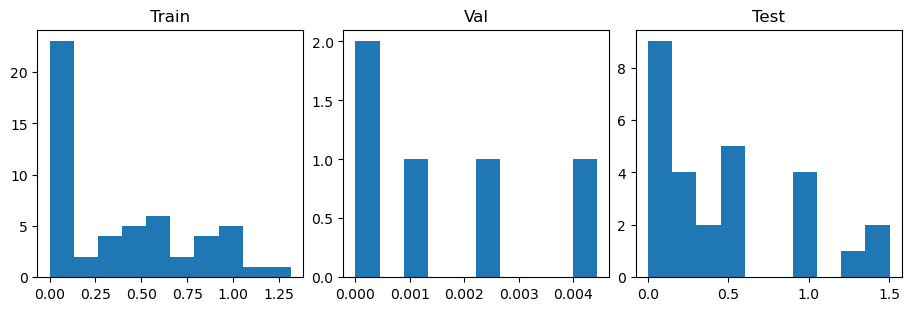

In [174]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_raw'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'fitness_raw'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'fitness_raw'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

Text(0.5, 1.0, 'Test')

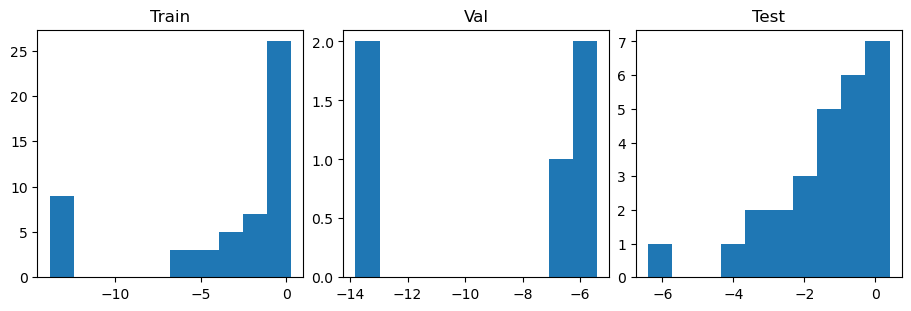

In [175]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_log'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'fitness_log'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'fitness_log'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

In [180]:
df_new['fitness_log'].min()

-13.815510557964274

In [179]:
df_new.loc[df_new['fitness_raw'] == 0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
5,IN1,APGIEAYARPPYVAPQGERERLLASLWRELLRVPEVGANDSFFALG...,0.0,2,41,-13.815511
6,IN2,RPGIEAYAIPPFKAPKGERERLLAEYYKELLDVNEVSSNDSFFKLG...,0.0,2,54,-13.815511
8,IN4,APGPEAYPRAPFVAPEGERERLLAEILAELLDVPRVGAGDGFFALG...,0.0,2,52,-13.815511
9,IN5,QPAPAAHAVPPAVAPEGEVEFLLADIMKRLLNVSRVSANKRFFALG...,0.0,2,60,-13.815511
11,IN7,APPLAAYPTPPYRAPVGPREELLARIVKSVLKVDRVGADDGFLRLG...,0.0,2,58,-13.815511
12,esm3_gen_17,IPDASTLPTAEYVAPRTEVEQTLAGIWAELLGVEQVGIHDNFFDLG...,0.0,1,71,-13.815511
16,esm3_gen_333,QPDRAVLLEQAYVAPRTTLEEQLASIWSELLQRERVGIHDNFFELG...,0.0,1,74,-13.815511
45,GxpS_DESIGN-11,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,4,-13.815511
53,GxpS_DESIGN-22,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,26,-13.815511
54,GxpS_DESIGN-23,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,33,-13.815511


In [195]:
np.sort(df_new['n_mut'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7, 26, 33, 34, 37, 39, 41, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 71, 74, 78,
       89])

In [177]:
df_new[df_new['n_mut']==0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.0,2,0,0.0


In [178]:
df_new.shape

(85, 6)

In [181]:
def hamming_distance(seq1, seq2):
    # Ensure the sequences are of the same length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length to compute Hamming distance.")
    
    # Count differences
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [182]:
dist_matrix = np.eye(df_new['seq'].shape[0])
sequences = df_new['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

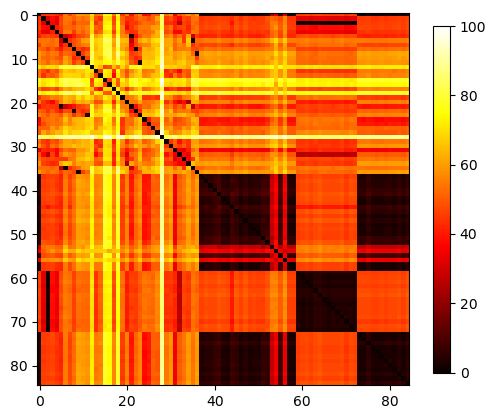

In [183]:
plt.figure(figsize=(6,6))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.show()

In [184]:
df_new['name'].to_numpy()

array(['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4',
       'IN5', 'IN6', 'IN7', 'esm3_gen_17', 'esm3_str_gen_53',
       'esm3_str_gen_170', 'esm3_gen_192', 'esm3_gen_333',
       'esm3_str_gen_365', 'esm3_gen_385', 'evodiff_gen_77',
       'II_guidance-ESM3', 'Test-IN1-improved', 'Test-IN4-improved',
       'Test-IN7-improved', 'evodiff_gen_21', 'evodiff_gen_88',
       'evodiff_gen_155', 'evodiff_gen_357', 'esm3_gen_93',
       'esm3_str_gen_314', 'esm3_str_gen_323', 'II guidance-WT',
       'II guidance-ESM2', 'II guidance-IN2', 'prob_guidancd-ESM2',
       'Test-IN2-improved', 'Test-IN5-improved', 'GxpS_DESIGN-1',
       'GxpS_DESIGN-3', 'GxpS_DESIGN-4', 'GxpS_DESIGN-5', 'GxpS_DESIGN-6',
       'GxpS_DESIGN-7', 'GxpS_DESIGN-8', 'GxpS_DESIGN-9',
       'GxpS_DESIGN-11', 'GxpS_DESIGN-14', 'GxpS_DESIGN-16',
       'GxpS_DESIGN-17', 'GxpS_DESIGN-18', 'GxpS_DESIGN-19',
       'GxpS_DESIGN-20', 'GxpS_DESIGN-21', 'GxpS_DESIGN-22',
       'GxpS_DESIGN-23', 'GxpS_DESIGN

Text(0.5, 1.0, 'Test')

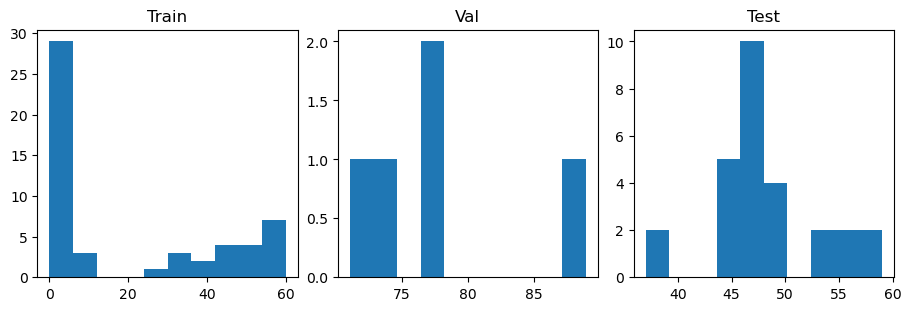

In [185]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'n_mut'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'n_mut'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'n_mut'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

/tmp/ipykernel_103769/2549241891.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_new.groupby('n_mut_bin')['fitness_raw'].apply(list)


Text(0, 0.5, 'Fitness Values')

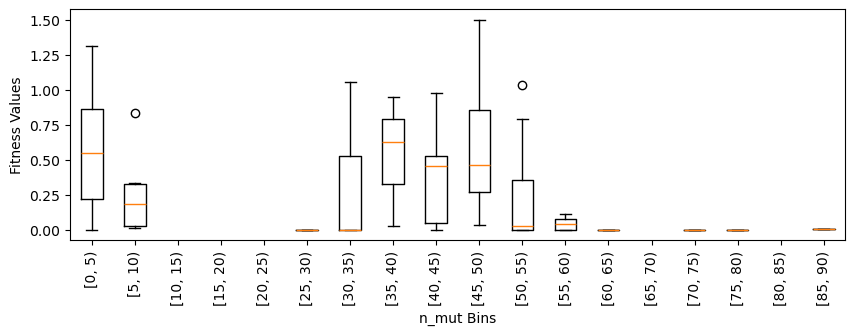

In [211]:
bin_edges = np.arange(0, max(df_new['n_mut']) + 5, 5)
df_new['n_mut_bin'] = pd.cut(df_new['n_mut'], bins=bin_edges, right=False)
grouped = df_new.groupby('n_mut_bin')['fitness_raw'].apply(list)
boxplot_data = [group for group in grouped]

plt.figure(figsize=(10, 3))
plt.boxplot(boxplot_data, labels=[str(group) for group in grouped.index], vert=True)
plt.xticks(rotation=90)
plt.xlabel('n_mut Bins')
plt.ylabel('Fitness Values')